In [16]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
cat_database = "dataset_mini/Cat"
dog_database = "dataset_mini/Dog"

In [18]:
def load_Procss_data(dataset, label):
    x,y,error = [],[],[]
    
    for file in os.listdir(dataset):
        try:
            image_path = os.path.join(dataset, file)
            image = cv2.imread(image_path)
#             print(image.shape)
            image = cv2.resize(image, (64,64))
#             print("after : ",image.shape)
            flatterd_img = image.flatten()
            x.append(flatterd_img)
            y.append(label)
        except Exception as e:
            error.append(str(e))
        
    print(f"Broken Images of Label {label}",len(error))
    return np.array(x), np.array(y)

In [19]:
x_cat, y_cat = load_Procss_data(cat_database, 0)
x_dog, y_dog = load_Procss_data(dog_database, 1)

Broken Images of Label 0 1
Broken Images of Label 1 0


In [20]:
x = np.vstack((x_cat,x_dog))
y = np.concatenate((y_cat,y_dog))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
model = svm.SVC(kernel="linear")

In [23]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [24]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0])

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 54.73%


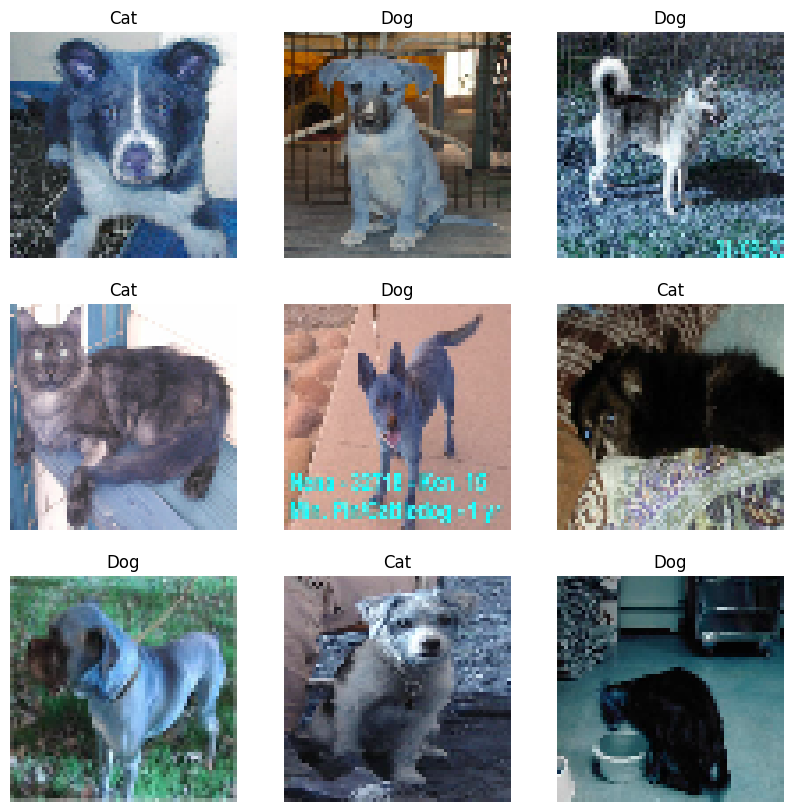

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

row = 3
col = 3

for i in range(1,10):
    fig.add_subplot(row, col, i)
    plt.axis('off')
    x1 = np.array(x_test[i])
    img1 = x1.reshape((64,64,3))
    plt.imshow(img1)
    if int(y_pred[i]) == 0:
        plt.title("Cat")
        i = i+1
    else : 
        plt.title("Dog")